### Problem Descrition

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Train/Test dataset
from sklearn.model_selection import train_test_split

# Machine Learn Model
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFECV as recursive_elimination

In [2]:
target_feat = ['Survived']

x = pd.read_csv('x_train.csv')
y = pd.read_csv('y_train.csv')

In [3]:
logistic_regression = LogisticRegression(solver = 'sag')

In [4]:
selector = recursive_elimination(logistic_regression, 
                                 step = 1, cv = 5
                                )
selector.fit(x,y['Survived'])
selec_feature = x.columns[selector.support_]
print(selec_feature)

Index(['SibSp', 'Fare', 'Age', 'Cabin_A', 'Cabin_C', 'Cabin_F', 'Cabin_G',
       'Title_Master', 'Sex'],
      dtype='object')


In [11]:
x = x[selec_feature]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y['Survived'],
                                                    test_size = 0.25,
                                                    random_state = 8
                                                   )

In [13]:
logistic_regression.fit(x_train, y_train);

In [14]:
y_predict = logistic_regression.predict(x_test);
y_prob =    logistic_regression.predict_proba(x_test);
 
acc_score = logistic_regression.score(x_test,y_test)
print('Accuracy Score {:.2f} \n'.format(acc_score))

print('\n'+classification_report(y_test, y_predict))

Accuracy Score 0.81 


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       139
           1       0.78      0.69      0.73        84

   micro avg       0.81      0.81      0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



AUC: 0.857


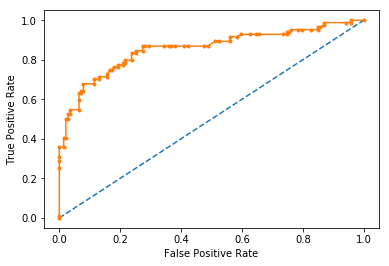

In [15]:
probs = y_prob[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()


In [16]:
import pickle
file = open('trained_model','wb')
pickle.dump(logistic_regression,file)
file.close();

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
SibSp           891 non-null float64
Fare            891 non-null float64
Age             891 non-null float64
Cabin_A         891 non-null int64
Cabin_C         891 non-null int64
Cabin_F         891 non-null int64
Cabin_G         891 non-null int64
Title_Master    891 non-null int64
Sex             891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB
